<a href="https://colab.research.google.com/github/garyos/titanic-kaggle/blob/master/Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Titanic dataset tutorial

This example will explore the analysis of the titanic dataset published on kaggle as a competition.

credit for the tutorial:
https://www.dataquest.io/blog/kaggle-fundamentals/

In [1]:
import pandas as pd

test_link = 'https://raw.githubusercontent.com/alessiocozzi/Kaggle-Competition---Titanic-Machine-Learning-from-Disaster/master/data/test.csv';
train_link = 'https://raw.githubusercontent.com/alessiocozzi/Kaggle-Competition---Titanic-Machine-Learning-from-Disaster/master/data/train.csv';

train = pd.read_csv(train_link)
test = pd.read_csv(test_link)



print("Dimensions of train {}".format(train.shape))
print("Dimensions of test {}".format(test.shape))



Dimensions of train (891, 12)
Dimensions of test (418, 11)


## Data dictionary
- PassengerID— A column added by Kaggle to identify each row and make submissions easier
- Survived— Whether the passenger survived or not and the value we are predicting (0=No, 1=Yes)
- Pclass— The class of the ticket the passenger purchased (1=1st, 2=2nd, 3=3rd)
- Sex— The passenger’s sex
- Age— The passenger’s age in years
- SibSp— The number of siblings or spouses the passenger had aboard the Titanic
- Parch— The number of parents or children the passenger had aboard the Titanic
- Ticket— The passenger’s ticket number
- Fare— The fare the passenger paid
- Cabin— The passenger’s cabin number
- Embarked— The port where the passenger embarked (C=Cherbourg, Q=Queenstown, S=Southampton)

In [2]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
train.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [4]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
test.tail()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
417,1309,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


In [6]:
print("Train Data")
train.info()
print("-"*20)
print("Test Data")
test.info()

Train Data
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
--------------------
Test Data
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-nul

# EDA

Exploring the dataset to identify interesting factors which may be used to analysed for binar classification

### Explore by Age

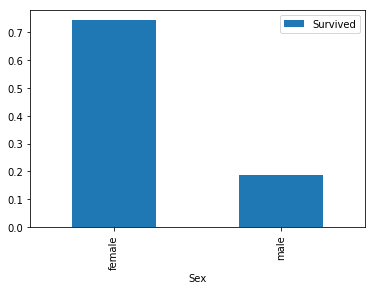

In [7]:
import matplotlib.pyplot as plt

sex_pivot = train.pivot_table(index="Sex", values="Survived")
sex_pivot.plot.bar()
plt.show()

### By Passenger Class...

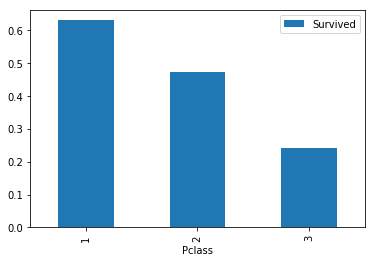

In [8]:
class_pivot = train.pivot_table(index="Pclass", values="Survived")
class_pivot.plot.bar()
plt.show()

In [9]:
train['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

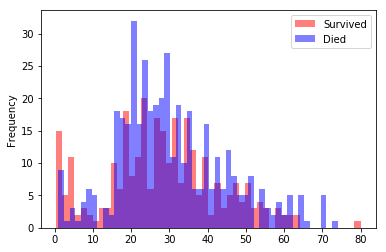

In [10]:
survived = train[train["Survived"] == 1]
died = train[train["Survived"] == 0]
survived["Age"].plot.hist(alpha=0.5, color='red', bins=50)
died["Age"].plot.hist(alpha=0.5, color='blue', bins=50)
plt.legend(['Survived','Died'])
plt.show()

### Using the pandas cut function to segment the data into categories

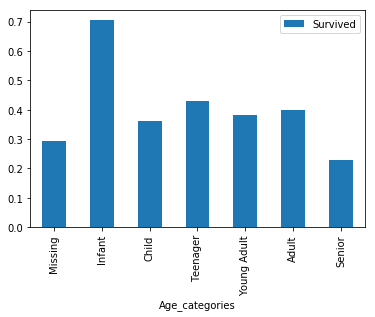

In [11]:
def process_age(df,cut_points,label_names):
    df["Age"] = df["Age"].fillna(-0.5)
    df["Age_categories"] = pd.cut(df["Age"],cut_points,labels=label_names)
    return df

cut_points = [-1,0,5,12,18,35,60,100]
label_names = ["Missing","Infant","Child","Teenager","Young Adult","Adult","Senior"]
train = process_age(train,cut_points,label_names)
test = process_age(test,cut_points,label_names)

pivot = train.pivot_table(index="Age_categories",values='Survived')
pivot.plot.bar()
plt.show()

### Data preparation for Machine Learning

In [13]:
train["Pclass"].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [0]:
def create_dummies(df, column_name):
  dummies = pd.get_dummies(df[column_name], prefix=column_name)
  df = pd.concat([df, dummies], axis=1)
  return df

for column in ["Pclass","Sex","Age_categories"]:
  train = create_dummies(train, column)
  test = create_dummies(test, column)

# Creating a Machine Learning Model



Model 1: Logistic regression:

scikit-learn steps;
- instantiate model
- it the model to the training data
- make predictions with model
- evaluate accuracy of predictions

Each model is a separate class.
Logistict Regression requires a 2D array (or df) for the features and a 1D array or Series to as the predictor target




In [17]:
from sklearn.linear_model import LogisticRegression

columns = ['Pclass_1', 'Pclass_2', 'Pclass_3', 'Sex_female', 'Sex_male',
       'Age_categories_Missing','Age_categories_Infant',
       'Age_categories_Child', 'Age_categories_Teenager',
       'Age_categories_Young Adult', 'Age_categories_Adult',
      'Age_categories_Senior']

lr = LogisticRegression()
lr.fit(train[columns], train["Survived"])


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

Splitting the dataset into training and test data. 
Here the original test data from kaggle has been re-assigned so that the data from the training set can be used as a subset.

In [0]:
holdout = test

from sklearn.model_selection import train_test_split

all_X = train[columns]
all_y = train['Survived']

train_X, test_X, train_y, test_y = train_test_split(all_X, all_y, test_size = 0.2, random_state=0)



## Testing the Logistic Regression model


In [19]:
lr = LogisticRegression()
lr.fit(train_X, train_y)
predictions = lr.predict(test_X)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


# Evaluating the model

Once you have tested your model the next step is evaluating the accuracy of the model. 

Kaggle likes to have accuracy as a metric and looks at the data in this way:

Model pred   |    Actual value    |      Correct?


In this case Scikit has accuracy_score builtin. This takes two params, the y_true and  y_pred for comparison

In [21]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(test_y, predictions)

print(accuracy)

0.8100558659217877


## Cross Validation

This technique helps to prevent over-fitting by training and testing the model on different splits of the data. This then avearges the accuracy scores. Folds are the iterations that we train our model on.


the syntax used in scikit 

model_selection.cross_val_score()

cross_val_score(estimator, X, y, cv=None)

estimator = the estimator object (LogReg)

X = all features
y  = target variables
cv = specifies the number of folds


In [22]:
from sklearn.model_selection import cross_val_score

lr = LogisticRegression()

scores = cross_val_score(lr, all_X, all_y, cv=10)
scores.sort()
accuracy = scores.mean()

print("Scores: {}".format(scores))
print("Scores: {}".format(accuracy))

[0.76404494 0.76404494 0.7752809  0.8        0.80681818 0.80898876
 0.80898876 0.81111111 0.83146067 0.87640449]
0.8047142776075361


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  Futur

# Testing on unseen data


In [23]:
lr = LogisticRegression()

lr.fit(all_X, all_y)

holdout_predictions = lr.predict(holdout[columns])

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


# Making a submission to Kaggle

In [0]:
holdout_ids = holdout["PassengerId"]
submission_df = {"PassengerId": holdout_ids,
                 "Survived": holdout_predictions}
submission = pd.DataFrame(submission_df)
submission.to_csv("submission.csv",index=False)